# Importing tne necessary libraries

In [1]:
!pip install keras_preprocessing #Install keras_preprocessing library


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import os
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Dropout ,Flatten , MaxPooling2D

In [3]:
pip install keras_preprocessing

In [4]:
!pip install kaggle

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 68% 41.0M/60.3M [00:00<00:00, 210MB/s]
100% 60.3M/60.3M [00:00<00:00, 211MB/s]


# Extracting the zip file

In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/fer2013.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


# Making train_directory and test_directory

In [7]:
train_dir='/content/train'
test_dir='/content/test'

# Creating dataframe for the train and test directory

In [8]:
def createdataframe(dir):
    image_paths=[]
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,'completed')
    return image_paths,labels

In [9]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(train_dir)


fear completed
disgust completed
neutral completed
sad completed
surprise completed
happy completed
angry completed


In [10]:
print(train)

                                            image  label
0       /content/train/fear/Training_20884995.jpg   fear
1       /content/train/fear/Training_89356500.jpg   fear
2        /content/train/fear/Training_4094445.jpg   fear
3       /content/train/fear/Training_37238169.jpg   fear
4       /content/train/fear/Training_80689648.jpg   fear
...                                           ...    ...
28704  /content/train/angry/Training_90865450.jpg  angry
28705  /content/train/angry/Training_45627810.jpg  angry
28706  /content/train/angry/Training_70713840.jpg  angry
28707   /content/train/angry/Training_2941397.jpg  angry
28708  /content/train/angry/Training_80720718.jpg  angry

[28709 rows x 2 columns]


In [11]:
train.shape

(28709, 2)

In [12]:
test=pd.DataFrame()
test['image'],test['label']=createdataframe(test_dir)

fear completed
disgust completed
neutral completed
sad completed
surprise completed
happy completed
angry completed


In [13]:
print(test)

                                             image  label
0       /content/test/fear/PublicTest_40311570.jpg   fear
1       /content/test/fear/PublicTest_44139516.jpg   fear
2      /content/test/fear/PrivateTest_43420384.jpg   fear
3      /content/test/fear/PrivateTest_11251019.jpg   fear
4       /content/test/fear/PublicTest_77365224.jpg   fear
...                                            ...    ...
7173   /content/test/angry/PrivateTest_9486917.jpg  angry
7174   /content/test/angry/PublicTest_69709353.jpg  angry
7175  /content/test/angry/PrivateTest_82869856.jpg  angry
7176  /content/test/angry/PrivateTest_77446000.jpg  angry
7177   /content/test/angry/PrivateTest_1809180.jpg  angry

[7178 rows x 2 columns]


In [14]:
test.shape

(7178, 2)

In [15]:
from tqdm.notebook import tqdm

#Extracting features from the image

In [16]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


#Extracting features from training set

In [17]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


#Extracting features from test set

In [18]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

#Normalization scales these pixel values range between 0 and 1

In [19]:
x_train = train_features/255.0
x_test = test_features/255.0

# Using label encoder for the training  and test set

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [22]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [23]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

# Using CNN Layers(Conv2D,MaxPooling2D,Activation Layer)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau


# Initialize the model
model = Sequential()

# Convolutional layers with Batch Normalization
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate reduction
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



#Fitting the model

In [25]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=60, batch_size=64, callbacks=[lr_scheduler])

Epoch 1/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.2016 - loss: 5.8110 - val_accuracy: 0.2501 - val_loss: 2.5818 - learning_rate: 0.0010
Epoch 2/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.3806 - loss: 2.0005 - val_accuracy: 0.4168 - val_loss: 1.6833 - learning_rate: 0.0010
Epoch 3/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4736 - loss: 1.5799 - val_accuracy: 0.4925 - val_loss: 1.5216 - learning_rate: 0.0010
Epoch 4/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5167 - loss: 1.4711 - val_accuracy: 0.4915 - val_loss: 1.5307 - learning_rate: 0.0010
Epoch 5/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5363 - loss: 1.4016 - val_accuracy: 0.5181 - val_loss: 1.4185 - learning_rate: 0.0010
Epoch 6/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5558 - loss: 1.3483 - val_accuracy: 0.5440 - val_loss: 1.3409 - learning_rate: 0.0010
Epoch 7/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5709 - l

#testing the image from the test_dir

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


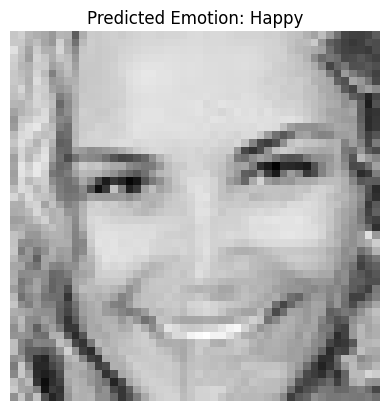

Predicted Emotion: Happy


In [26]:
import numpy as np
import cv2  # For image processing
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model


# Define emotion labels (adjust based on your dataset)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load and preprocess the test image
def preprocess_image(img_path):
    # Load image in grayscale mode
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Resize to match the input shape of the model
    img = cv2.resize(img, (48, 48))

    # Normalize pixel values to range [0, 1]
    img = img.astype('float32') / 255.0

    # Reshape to (1, 48, 48, 1) for prediction
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)

    return img

# Test image path
test_image_path = '/content/test/happy/PrivateTest_10077120.jpg'   # Replace with the path to your test image

# Preprocess the image
preprocessed_image = preprocess_image(test_image_path)

# Predict the emotion
prediction = model.predict(preprocessed_image)
predicted_emotion = emotion_labels[np.argmax(prediction)]

# Display the test image and prediction
plt.imshow(cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')
plt.show()

print(f'Predicted Emotion: {predicted_emotion}')


# testing the image from test_dir

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


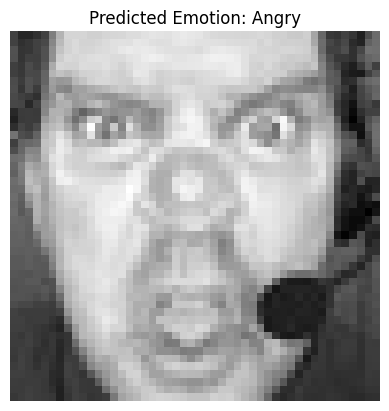

Predicted Emotion: Angry


In [27]:
import numpy as np
import cv2  # For image processing
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model


# Define emotion labels (adjust based on your dataset)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load and preprocess the test image
def preprocess_image(img_path):
    # Load image in grayscale mode
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Resize to match the input shape of the model
    img = cv2.resize(img, (48, 48))

    # Normalize pixel values to range [0, 1]
    img = img.astype('float32') / 255.0

    # Reshape to (1, 48, 48, 1) for prediction
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)

    return img

# Test image path
test_image_path ='/content/test/angry/PrivateTest_21230097.jpg'   # Replace with the path to your test image

# Preprocess the image
preprocessed_image = preprocess_image(test_image_path)

# Predict the emotion
prediction = model.predict(preprocessed_image)
predicted_emotion = emotion_labels[np.argmax(prediction)]

# Display the test image and prediction
plt.imshow(cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')
plt.show()

print(f'Predicted Emotion: {predicted_emotion}')
